In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importar librerias y leer archivos**

In [0]:
#Importando librerias

import pandas as pd
import missingno as msno
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Leer archivos de datos

jugadores=pd.read_csv ("/content/drive/My Drive/proyecto5/WorldCupPlayers.csv")
partidos=pd.read_csv ("/content/drive/My Drive/proyecto5/WorldCupMatches.csv")
copas=pd.read_csv ("/content/drive/My Drive/proyecto5/WorldCups.csv")


# **Punto 1**

# Determinar si son datos categoricos o cuantitativos en cada dataframe

### Copa
**Year** = "variable categorica"
**Country** = "variable categorica"
**Winner** = "variable categorica "
**Runners-up** = "variable categorica "
**Third** = "variable categorica "
**Fourth** = "variable categorica "
**GoalScored** = "variable cuantitativa"
**Qualified Teams** = "variable cuantitativa"
**MatchesPlayes** = "variable cuantitativa"
**Attendance** = "variable cuantitativa"

In [5]:
copas.head(15)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


### Jugadores
**RoundID** = "variable categorica"
**MatchID**= "variable categorica"
**Team Initials** = "variable categorica"
**Coach Name** = "variable categorica"
**Line Up** = "variable categorica"
**Shirt Number** = "variable categorica"
**Player Name** = "variable categorica"
**Position** = "variable categorica"
**Event** = "variable categorica"

In [6]:
jugadores.head(30)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
5,201,1096,MEX,LUQUE Juan (MEX),S,0,Rafael GARZA,C,NaN
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
7,201,1096,MEX,LUQUE Juan (MEX),S,0,Hilario LOPEZ,NaN,NaN
8,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Etienne MATTLER,NaN,NaN
9,201,1096,MEX,LUQUE Juan (MEX),S,0,Dionisio MEJIA,NaN,NaN


### Partidos
**Year** = "variable categorica"
**Datetime** = "variable categorica"
**Stage** = "variable categorica"
**Stadium** = "variable categorica"
**City** = "variable categorica"
**Home Team Name** = "variable categorica"
**Home Team Goals** = "variable cuantitativa"
**Away Team Goals** = "variable cuantitativa"
**Away Team Name** = "variable categorica"
**Win Conditions** = "variable categorica"
**Attendance** = "variable cuantitativa"
**Half Time Home Goals** = "variable cuantitativa"
**Half Time Away Goals** = "variable cuantitativa"
**Referee** = "variable categorica"
**Assistant 1** = "variable categorica"
**Assistant 2** = "variable categorica"
**RoundID** = "variable categorica"
**MatchID** = "variable categorica"
**Home Team Initials** = "variable categorica"
**Away Team Initials** = "variable categorica"

In [7]:
partidos.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


# Analisis de los datos nulos

## Revisar datos nulos por cada dataframe

Con la libreria missigno se ve visualmente las celdas que no tienen informacion (en color blanco) en los dataframe, ahora los ejecutaremos para cada dataframe.

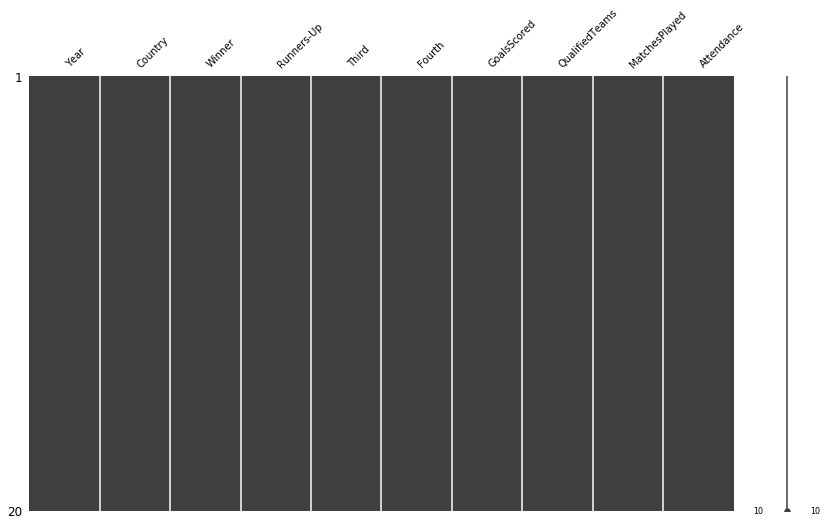

In [8]:
msno.matrix(copas,figsize = (14,8), fontsize = 10);


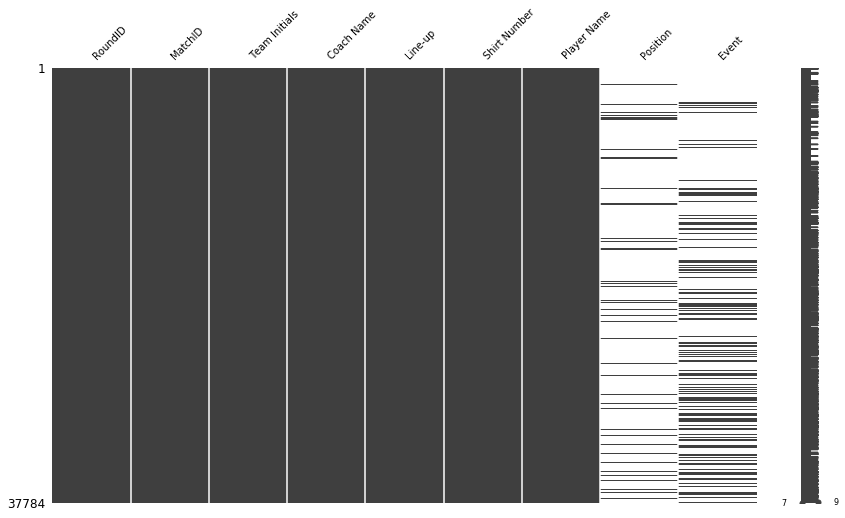

In [9]:
msno.matrix(jugadores,figsize = (14,8), fontsize = 10);

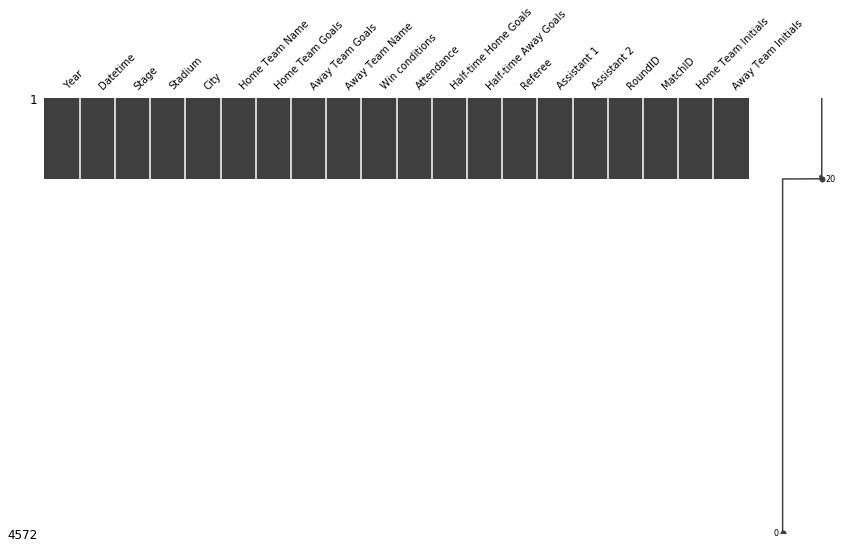

In [10]:
msno.matrix(partidos,figsize = (14,8), fontsize = 10);

Como podemos observar, podemos decir que en datos nulos del **dataframe de copas** no tenemos datos nulos, en el **dataframe de jugadores** podemos ver datos nulos en la columna Position y Event, esto es porque el primero no estan escrita las posiciones de los jugadores y en eventos no todos los jugadores obtienen amonestaciones o goles dentro de cada partido, en este caso eliminar las filas que tienen estos datos nulos solo lograriamos perder muchos datos relevantes para el analisis. En el **dataframe partidos** tenemos muchos datos nulos que es necesario hacer un drop.na

## Tratamiento datos nulos

In [11]:
#Revisar la cantidad de partidos jugados en mundiales
copas["MatchesPlayed"].sum()

836

In [12]:
#Para eliminar cantidad de datos duplicados
jugadores=jugadores.drop_duplicates()

#Para revisar la cantidad de partidos del df jugadores
len(jugadores["MatchID"].unique())

836

In [0]:
#para quitar los valores nulos del df partidos

partidos1=partidos.dropna(thresh=2)
partidos1=partidos1.drop_duplicates(subset ="MatchID",keep='last')
# print(partidos2.to_string())

# **Punto 2**

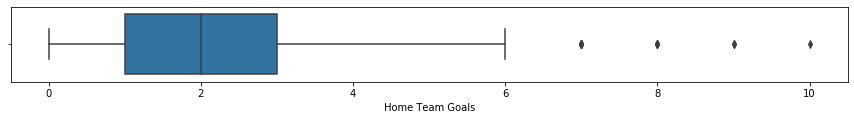

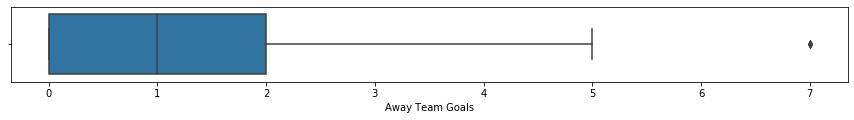

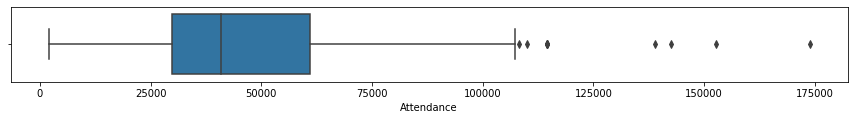

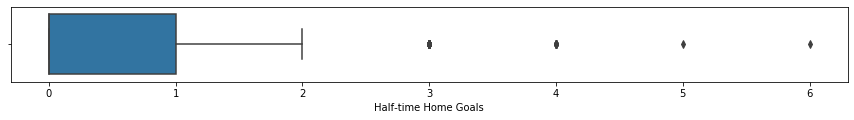

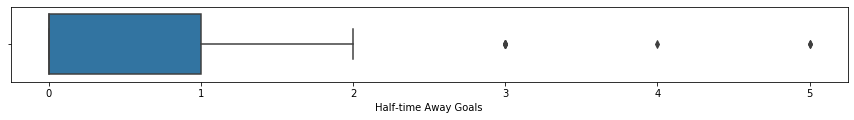

In [14]:
col_matches = partidos1[['Home Team Goals','Away Team Goals', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals']]
for i, col in enumerate(col_matches):
    plt.figure(figsize=(15,8))
    plt.subplot(5,1,i+1)
    sns.boxplot(col_matches[col])

Los datos outliers en realidad no lo son, son datos que se pueden escapar de lo comun de los partidos pero son datos que realmente pasa, por ejemplo un partido con muchos goles, o un partido que tuvo mucho publico. Estos datos los encuentro relevantes para mi analisis y por ende no voy eliminar a menos que durante el trabajo vea un dato que no coincide con nada real.

# **Punto 3**

In [15]:
jugadores1=jugadores.copy()
#Para cambiar los registros de RONALDO por C.RONALDO ya que hay RONALDO para el portugues tambien
jugadores1[(jugadores1["Player Name"]=="RONALDO")&(jugadores1["Team Initials"]=="POR")]=jugadores1[(jugadores1["Player Name"]=="RONALDO")&(jugadores1["Team Initials"]=="POR")].replace({"RONALDO":"C.RONALDO"})

#Para comprobardoble
jugadores1[(jugadores1["Player Name"]=="C.RONALDO")]

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
28559,97410100,97410008,POR,SCOLARI Luiz Felipe (BRA),S,17,C.RONALDO,NaN,Y26' O60'
29291,97410100,97410024,POR,SCOLARI Luiz Felipe (BRA),S,17,C.RONALDO,NaN,P80'
29957,97410100,97410039,POR,SCOLARI Luiz Felipe (BRA),N,17,C.RONALDO,NaN,NaN
30579,97410200,97410052,POR,SCOLARI Luiz Felipe (BRA),S,17,C.RONALDO,NaN,O34'
30902,97410300,97410059,POR,SCOLARI Luiz Felipe (BRA),S,17,C.RONALDO,NaN,NaN
31039,97410400,97410062,POR,SCOLARI Luiz Felipe (BRA),S,17,C.RONALDO,NaN,NaN
31086,97410500,97410063,POR,SCOLARI Luiz Felipe (BRA),S,17,C.RONALDO,NaN,NaN
31721,249722,300061489,POR,Carlos QUEIR�S (POR),S,7,C.RONALDO,C,Y21'
32500,249722,300061487,POR,Carlos QUEIR�S (POR),S,7,C.RONALDO,C,G87'
33192,249722,300111111,POR,Carlos QUEIR�S (POR),S,7,C.RONALDO,C,NaN


In [16]:


#para crear una columna con la cantidad de goles totales por partido
partidos1['goles por partido'] = partidos1['Home Team Goals'] + partidos1['Away Team Goals'] 

#para crear una columna con la recta entre goles de local y visita
partidos1['dif goles'] = (partidos1['Home Team Goals'] - partidos1['Away Team Goals'])
#Resultado equipo local
partidos1['Resultado Local'] = partidos1['dif goles'].apply(lambda x: 'Ganados' if x >0  else ("Empatados" if x==0 else "Perdidos"))
#Resultados equipo visita
partidos1['Resultado Visita'] = partidos1['dif goles'].apply(lambda x: 'Perdidos' if x >0  else ("Empatados" if x==0 else "Ganados"))


#Resultado visita
#partidos1["ganador partido"]=partidos1[]
#partidos1.head(10)

#para ver en porcentaje los partidos ganados, empatados y perdidos en los mundiales segun equipo local
partidos1["Resultado Local"].value_counts("%")*100


Ganados      57.296651
Empatados    22.248804
Perdidos     20.454545
Name: Resultado Local, dtype: float64

In [17]:
#cantidad de partidos ganados, empatados y perdidos segun equipo local
partidos1["Resultado Local"].value_counts()

Ganados      479
Empatados    186
Perdidos     171
Name: Resultado Local, dtype: int64

In [18]:
# Los paises ganadores de copas y las veces ganadas

copas.groupby(['Winner'])['Country'].count()\
.to_frame(name='Cantidad')


,Cantidad
Winner,
Argentina,2
Brazil,5
England,1
France,1
Germany,1
Germany FR,3
Italy,4
Spain,1
Uruguay,2


In [19]:
#Los paises subcampeones y la cantidad de veces

copas.groupby(['Runners-Up'])['Runners-Up'].count()\
.to_frame(name='Cantidad')

,Cantidad
Runners-Up,
Argentina,3
Brazil,2
Czechoslovakia,2
France,1
Germany,1
Germany FR,3
Hungary,2
Italy,2
Netherlands,3


In [20]:
# Los paises ganadores de copas y las veces ganadas

pd.pivot_table(copas,index=['Winner',],values='Country',
               aggfunc='count').sort_values("Country", ascending=False)#.plot.bar();

,Country
Winner,
Brazil,5
Italy,4
Germany FR,3
Argentina,2
Uruguay,2
England,1
France,1
Germany,1
Spain,1


In [21]:
# Los paises subcampeones y la cantidad de veces

pd.pivot_table(copas,index=["Runners-Up"],values='Country',
               aggfunc='count').sort_values("Country", ascending=False)

,Country
Runners-Up,
Argentina,3
Germany FR,3
Netherlands,3
Brazil,2
Czechoslovakia,2
Hungary,2
Italy,2
France,1
Germany,1


In [22]:
# Paises donde mas se han marcado goles en mundiales

pd.pivot_table(copas,index=["Country"],values='GoalsScored',
               aggfunc='sum').sort_values("GoalsScored", ascending=False)

,GoalsScored
Country,
Brazil,259
France,255
Germany,244
Mexico,227
Italy,185
Korea/Japan,161
Spain,146
South Africa,145
USA,141


In [23]:
# jugadores con mas presencia en mundiales

jugadores1.groupby("Player Name")["MatchID"].nunique().sort_values(ascending=False).head(15)

Player Name
KLOSE                      28
CAFU                       26
RONALDO                    26
Sepp MAIER                 25
DIDA                       25
LEAO                       25
Wladyslaw ZMUDA            24
M�LLER                     24
OSCAR                      24
Diego MARADONA             23
Dino ZOFF                  23
Giuseppe BERGOMI           23
SILVA                      23
Karl-Heinz SCHNELLINGER    22
JULIO CESAR                22
Name: MatchID, dtype: int64

In [24]:
# # los 10 jugadores con mas presencia en mundiales

pd.pivot_table(jugadores1,index=["Player Name"],values='MatchID',
               aggfunc='count').sort_values("MatchID", ascending=False).head(10)["MatchID"]#.plot.bar();

Player Name
KLOSE              28
CAFU               26
RONALDO            26
Sepp MAIER         25
DIDA               25
LEAO               25
M�LLER             24
Wladyslaw ZMUDA    24
SILVA              24
OSCAR              24
Name: MatchID, dtype: int64

In [25]:
# Entrenadores con mas partidos en mundiales

jugadores.groupby("Coach Name").nunique().sort_values("MatchID",ascending=False).head(15)["MatchID"]
                                                              

Coach Name
SCHOEN Helmut (FRG)              25
PARREIRA Carlos Alberto (BRA)    23
SCOLARI Luiz Felipe (BRA)        21
ZAGALLO Mario (BRA)              20
MILUTINOVIC Bora (YUG)           20
BEARZOT Enzo (ITA)               18
HERBERGER Sepp (FRG)             18
HIDDINK Guus (NED)               18
THYS Guy (BEL)                   16
MICHEL Henri (FRA)               16
BAROTI Lajos (HUN)               15
TABAREZ Oscar (URU)              15
BILARDO Carlos (ARG)             14
WINTERBOTTOM Walter (ENG)        14
LOEW Joachim (GER)               14
Name: MatchID, dtype: int64

In [26]:
#los arbitros con mas partidos

pd.pivot_table(partidos1,index=["Referee"],values='MatchID',
               aggfunc='count').sort_values("MatchID", ascending=False)

,MatchID
Referee,
Ravshan IRMATOV (UZB),9
QUINIOU Joel (FRA),8
LARRIONDA Jorge (URU),8
ARCHUNDIA Benito (MEX),8
LANGENUS Jean (BEL),7
...,...
EL GHOUL Yusef Mohamed (LBY),1
ORTIZ Hector (PAR),1
ORTUBE Rene (BOL),1


# **Punto 4**

## Concurrencia de público para los años donde se disputó el mundial FIFA

In [27]:
copas[["Year","Attendance"]]

,Year,Attendance
0,1930,590.549
1,1934,363.000
2,1938,375.700
3,1950,1.045.246
4,1954,768.607
5,1958,819.810
6,1962,893.172
7,1966,1.563.135
8,1970,1.603.975
9,1974,1.865.753


## Concurrencia de público según los distintos horarios

In [28]:
partidos1[["Datetime","Home Team Name", "Away Team Name","Attendance"]]

,Datetime,Home Team Name,Away Team Name,Attendance
0,13 Jul 1930 - 15:00,France,Mexico,4444.0
1,13 Jul 1930 - 15:00,USA,Belgium,18346.0
2,14 Jul 1930 - 12:45,Yugoslavia,Brazil,24059.0
3,14 Jul 1930 - 14:50,Romania,Peru,2549.0
4,15 Jul 1930 - 16:00,Argentina,France,23409.0
...,...,...,...,...
847,05 Jul 2014 - 17:00,Netherlands,Costa Rica,51179.0
848,08 Jul 2014 - 17:00,Brazil,Germany,58141.0
849,09 Jul 2014 - 17:00,Netherlands,Argentina,63267.0
850,12 Jul 2014 - 17:00,Brazil,Netherlands,68034.0


## Partidos con mayor concurrencia de público

In [29]:
partidos1[["Datetime","Home Team Name", "Away Team Name","Stadium","Attendance"]].sort_values(by="Attendance", ascending=False).head(12)



,Datetime,Home Team Name,Away Team Name,Stadium,Attendance
74,16 Jul 1950 - 15:00,Uruguay,Brazil,Maracan� - Est�dio Jornalista M�rio Filho,173850.0
71,13 Jul 1950 - 15:00,Brazil,Spain,Maracan� - Est�dio Jornalista M�rio Filho,152772.0
63,01 Jul 1950 - 15:00,Brazil,Yugoslavia,Maracan� - Est�dio Jornalista M�rio Filho,142429.0
70,09 Jul 1950 - 15:00,Brazil,Sweden,Maracan� - Est�dio Jornalista M�rio Filho,138886.0
379,07 Jun 1986 - 12:00,Mexico,Paraguay,Estadio Azteca,114600.0
411,29 Jun 1986 - 12:00,Argentina,Germany FR,Estadio Azteca,114600.0
407,22 Jun 1986 - 12:00,Argentina,England,Estadio Azteca,114580.0
397,15 Jun 1986 - 12:00,Mexico,Bulgaria,Estadio Azteca,114580.0
409,25 Jun 1986 - 16:00,Argentina,Belgium,Estadio Azteca,114500.0
367,03 Jun 1986 - 12:00,Belgium,Mexico,Estadio Azteca,110000.0


Los partidos con mas publico son 4 que se hicieron en brazil en el estadio maracana en el año 1950, quienes lo siguen en cantidad de publico son partidos delos mundiales de mexico 1970 y 1986 en el estadio azteca.

## Mundiales con mas publicoen total

In [208]:
asistencia4 = copas[['Year','Country','Attendance']].copy()
asistencia4['Attendance'] = asistencia4.Attendance.astype(str)
asistencia4['Attendance'] = asistencia4.Attendance.str.replace('.', '').astype(int)  
asistencia4.sort_values(by='Attendance',ascending=False).head(8)


,Year,Country,Attendance
14,1994,USA,3587538
19,2014,Brazil,3386810
17,2006,Germany,3359439
18,2010,South Africa,3178856
15,1998,France,2785100
16,2002,Korea/Japan,2705197
13,1990,Italy,2516215
12,1986,Mexico,2394031


En este caso, el mundial que ha tenido mas publico es el de eeuu en 1994, luego lo sigue brazil 2014 y posteriomente alemania 2006.

# **Punto 5**

## Cantidad de goles anotados por cada uno de los eventos mundialistas

In [30]:
punto5=partidos1[["Datetime","Home Team Name","Away Team Name","Home Team Goals","Away Team Goals","goles por partido","MatchID"]]
p5=punto5[["Home Team Name","Away Team Name","goles por partido"]]
p5

,Home Team Name,Away Team Name,goles por partido
0,France,Mexico,5.0
1,USA,Belgium,3.0
2,Yugoslavia,Brazil,3.0
3,Romania,Peru,4.0
4,Argentina,France,1.0
...,...,...,...
847,Netherlands,Costa Rica,0.0
848,Brazil,Germany,8.0
849,Netherlands,Argentina,0.0
850,Brazil,Netherlands,3.0


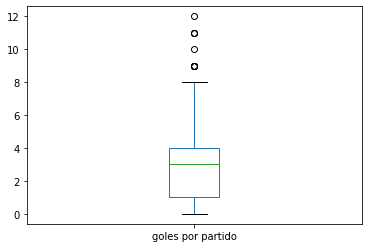

In [31]:
punto5[["Home Team Name","Away Team Name","goles por partido"]].plot.box();


la mayor parte de los goles se agrupan ente los partidos que tienen 1 gol y los partidos que tienen 4 goles, aunque la mediana es de 3 goles por partido. Tambien estan dentro del boxplot los partidos sin goles y los que tienen entre 4 a 8 goles, aunque muy fuera de lo comun se encuentran los partidos con 9, 10, 11 y 12 goles.

## Distribución de los goles de local y visita

Home Team Goals    1525.0
Away Team Goals     854.0
dtype: float64

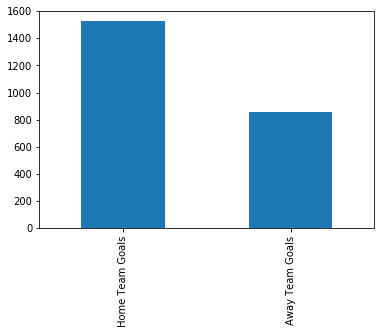

In [32]:
p5b=punto5[["Home Team Goals","Away Team Goals"]]
p5b.sum().plot.bar();
p5b.sum()

#Existen mas goles de local que de los partidos de visitas

# **Punto 6**

##Resultados de los partidos por países

In [33]:
locales6=partidos1[["Home Team Name","Resultado Local"]]
locales6.columns=["Pais","Resultado"]
visitas6=partidos1[["Away Team Name","Resultado Visita"]]
visitas6.columns=["Pais","Resultado"]
frames = [locales6,visitas6]

punto6=pd.concat([locales6, visitas6], axis=0, join="inner")# no es necesario en este caso el join inner pero sirve en caso que tenga datos distintos y esos no los pesca, como el merge con la columna que se indica
resultadoscompletos6=pd.crosstab(index=punto6["Pais"],columns=punto6['Resultado'])
print(resultadoscompletos6.to_string())

Resultado                   Empatados  Ganados  Perdidos
Pais                                                    
Algeria                             3        3         7
Angola                              2        0         1
Argentina                          14       42        21
Australia                           3        2         8
Austria                             4       12        13
Belgium                             9       14        18
Bolivia                             1        0         5
Brazil                             17       70        17
Bulgaria                            8        3        15
Cameroon                            7        4        12
Canada                              0        0         3
Chile                               7       11        15
China PR                            0        0         3
Colombia                            2        7         9
Costa Rica                          4        5         6
Croatia                        

# **Punto 7**

## Realice tanto Cross - Table como Pivot - Table para mejorar su análisis en base a elementos como por ejemplo, año y ciudad del evento mundialista

concuerda con el total del df de copas

In [35]:

pd.crosstab(index=[partidos1['Year'],partidos1['Attendance']],
            columns=partidos1['goles por partido'], margins=False)

goles por partido  0.0   1.0   2.0   3.0   4.0   ...  8.0   9.0   10.0  11.0  12.0
Year   Attendance                                ...                              
1930.0 2000.0         0     1     0     0     0  ...     0     0     0     0     0
       2549.0         0     0     0     0     1  ...     0     0     0     0     0
       4444.0         0     0     0     0     0  ...     0     0     0     0     0
       9249.0         0     0     0     1     0  ...     0     0     0     0     0
       12000.0        0     1     0     0     0  ...     0     0     0     0     0
...                 ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...
2014.0 73804.0        0     0     1     0     0  ...     0     0     0     0     0
       73819.0        0     1     0     0     0  ...     0     0     0     0     0
       74101.0        0     0     1     0     0  ...     0     0     0     0     0
       74240.0        0     1     0     0     0  ...     0     0     0     0     0
       74738.0        0     1     0     1     0  ...     0     0     0     0     0

[680 rows x 13 columns]

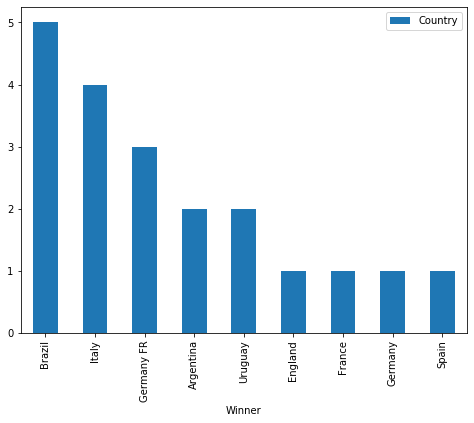

In [234]:
# esto lo hice mas arriba en el punto 3 porque le pude dar orden descendente con pivot table

# Los paises ganadores de copas y las veces ganadas

pd.pivot_table(copas,index=['Winner',],values='Country',
               aggfunc='count').sort_values("Country", ascending=False).plot.bar(figsize=(8, 6));

El pais que mas ha ganado las copas mundiales es brasil, despues lo sigue italia y alemania con 4 copas y en tercer puesto se encuentra argentina con uruguay con 2 copas mundiales

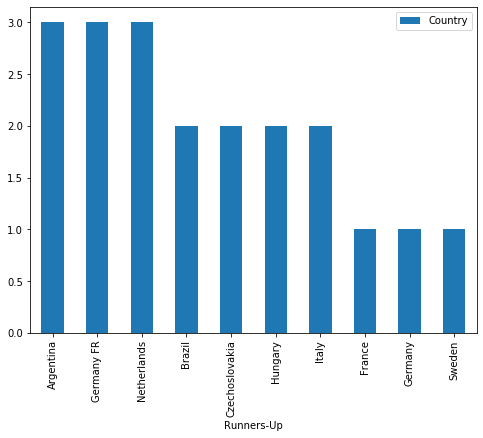

In [235]:
# Los paises subcampeones y la cantidad de veces

pd.pivot_table(copas,index=["Runners-Up"],values='Country',
               aggfunc='count').sort_values("Country", ascending=False).plot.bar(figsize=(8, 6));

El pais mas subcampeon es alemania con 4 semifinales perdidas

In [210]:
#este crosstab mas las uniones son solo a modo de comprobacion del punto 6, el cual los datos me dan exactamente igual

df6=pd.crosstab(index=partidos1['Home Team Name'], columns=[partidos1["Resultado Local"]], margins=False).reset_index()
dff6=pd.crosstab(index=partidos1['Away Team Name'], columns=[partidos1["Resultado Visita"]], margins=False).reset_index()

display(df6, dff6)

Resultado Local,Home Team Name,Empatados,Ganados,Perdidos
0,Algeria,2,1,3
1,Angola,0,0,1
2,Argentina,5,39,8
3,Australia,1,2,3
4,Austria,1,10,2
...,...,...,...,...
73,"rn"">Bosnia and Herzegovina",0,1,0
74,"rn"">Republic of Ireland",5,0,0
75,"rn"">Serbia and Montenegro",0,0,1
76,"rn"">Trinidad and Tobago",1,0,0


Resultado Visita,Away Team Name,Empatados,Ganados,Perdidos
0,Algeria,1,2,4
1,Angola,2,0,0
2,Argentina,9,3,13
3,Australia,2,0,5
4,Austria,3,2,11
...,...,...,...,...
78,"rn"">Bosnia and Herzegovina",0,0,2
79,"rn"">Republic of Ireland",3,2,3
80,"rn"">Serbia and Montenegro",0,0,2
81,"rn"">Trinidad and Tobago",0,0,2


In [0]:
df_j = df6.set_index('Home Team Name').add(dff6.set_index('Away Team Name'), fill_value=0).reset_index()

In [40]:
df_j

Resultado Local,index,Empatados,Ganados,Perdidos
0,Algeria,3.0,3.0,7.0
1,Angola,2.0,0.0,1.0
2,Argentina,14.0,42.0,21.0
3,Australia,3.0,2.0,8.0
4,Austria,4.0,12.0,13.0
...,...,...,...,...
78,"rn"">Bosnia and Herzegovina",0.0,1.0,2.0
79,"rn"">Republic of Ireland",8.0,2.0,3.0
80,"rn"">Serbia and Montenegro",0.0,0.0,3.0
81,"rn"">Trinidad and Tobago",1.0,0.0,2.0


In [0]:
df_j2 = df6.groupby('Home Team Name').sum().add(dff6.groupby('Away Team Name').sum(), fill_value=0).reset_index()


In [42]:
df_j2

Resultado Local,index,Empatados,Ganados,Perdidos
0,Algeria,3.0,3.0,7.0
1,Angola,2.0,0.0,1.0
2,Argentina,14.0,42.0,21.0
3,Australia,3.0,2.0,8.0
4,Austria,4.0,12.0,13.0
...,...,...,...,...
78,"rn"">Bosnia and Herzegovina",0.0,1.0,2.0
79,"rn"">Republic of Ireland",8.0,2.0,3.0
80,"rn"">Serbia and Montenegro",0.0,0.0,3.0
81,"rn"">Trinidad and Tobago",1.0,0.0,2.0


# **Punto 8**

# análisis de los jugadores con las mejores estadísticas según los mundiales disputados 

In [241]:
# los 10 jugadores con mas presencia en mundiales

pd.pivot_table(jugadores1,index=["Player Name"],values='MatchID',
               aggfunc='count').sort_values("MatchID", ascending=False).head(10)#.plot.bar(figsize=(8, 6));

,MatchID
Player Name,
KLOSE,28
CAFU,26
RONALDO,26
Sepp MAIER,25
DIDA,25
LEAO,25
M�LLER,24
Wladyslaw ZMUDA,24
SILVA,24


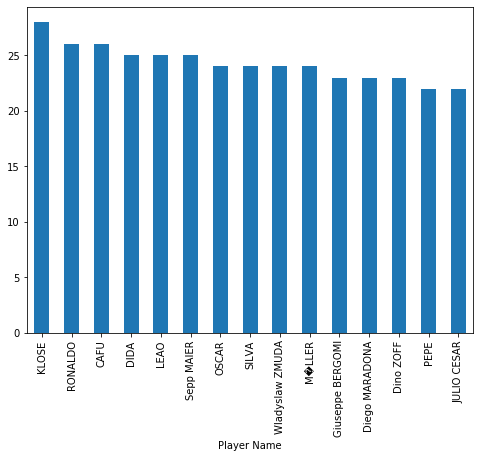

In [242]:
# los jugadores con mas presencia en mundiales

jugadores1.groupby("Player Name")["MatchID"].count().sort_values(ascending=False).head(15).plot.bar(figsize=(8, 6));

In [45]:
# los jugadores con mas partidos de titular
titular8=jugadores1[jugadores1["Line-up"]=="S"].copy()
titular8.groupby("Player Name")["MatchID"].count().sort_values(ascending=False).head(15)


Player Name
KLOSE               22
Uwe SEELER          21
Diego MARADONA      21
Grzegorz LATO       20
LAHM                20
Wladyslaw ZMUDA     20
RONALDO             19
OSCAR               19
Berti VOGTS         19
Wolfgang OVERATH    19
Thomas BERTHOLD     18
Antonio CABRINI     18
TAFFAREL            18
SCHWEINSTEIGER      18
DUNGA               18
Name: MatchID, dtype: int64

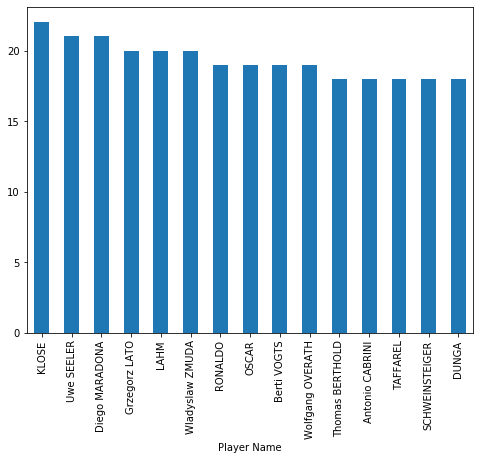

In [243]:
# los jugadores con mas partidos de titular
titular8=jugadores1[jugadores1["Line-up"]=="S"].copy()
titular8.groupby("Player Name")["MatchID"].count().sort_values(ascending=False).head(15).plot.bar(figsize=(8, 6));

In [193]:
#Todo el codigo a continuacion es para extraer los datos de eventos, para eso elimino primeramente la columna position ya no es relevante
#por todos los datos que faltan, no sirve para hacer un analisis y de esta forma queda solo la columna eventos con datos nan, entonces se le aplica un drop na

jugadores8=jugadores1.drop(["Position"], axis="columns")
jugadores8=jugadores8.dropna()


# G = Gol
# Y = Tarjeta amarilla
# RSY = Tarjeta roja por segunda tarjeta amarilla
# R = Tarjeta roja
# O = Cambio fuera
# I = Cambio en
# OH = Cambio fuera en el descanso
# IH = Cambio en el descanso
# W = Gol propio
# P = Penalización puntuada
# MP = Penalización perdida
# U = Evento desconocido

# 99 ′ = Minuto en el que ocurrió el evento

# Los eventos I - O y IH - OH son complementarios. Cuando un jugador se va, otro jugador entra en el mismo minuto del partido.



#hacer columnas con los datos extraidos de la columna eventos
jugadores8['goles marcados'] = jugadores8.Event.str.count('G')+jugadores8.Event.str.count('P')
jugadores8['ingreso a la cancha'] = jugadores8.Event.str.count("I")#+jugadores8.Event.str.count("IH")
jugadores8['tarjetas amarillas'] = jugadores8.Event.str.count("Y")+jugadores8.Event.str.count("RSY")
jugadores8['tarjetas roja'] = jugadores8.Event.str.count("R")
jugadores8['sustituido'] = jugadores8.Event.str.count("O")#+jugadores8.Event.str.count("OH")
jugadores8['penales perdidos'] = jugadores8.Event.str.count("MP")
jugadores8['penales acertados'] = jugadores8.Event.str.count("P")
jugadores8['autogol'] = jugadores8.Event.str.count("W")
jugadores8[jugadores8["Player Name"]=="Guillermo STABILE"]

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Event,goles marcados,ingreso a la cancha,tarjetas amarillas,tarjetas roja,sustituido,penales perdidos,penales acertados,autogol
386,201,1086,ARG,OLAZAR Francisco (ARG),S,0,Guillermo STABILE,G8' G17' G80',3,0,0,0,0,0,0,0
545,201,1084,ARG,OLAZAR Francisco (ARG),S,0,Guillermo STABILE,G12' G13',2,0,0,0,0,0,0,0
574,202,1088,ARG,OLAZAR Francisco (ARG),S,0,Guillermo STABILE,G69' G87',2,0,0,0,0,0,0,0
660,405,1087,ARG,OLAZAR Francisco (ARG),S,0,Guillermo STABILE,G37',1,0,0,0,0,0,0,0


In [244]:
# los 10 mas goleadores en los mundiales

pd.pivot_table(jugadores8,index=["Player Name"],values='goles marcados',
               aggfunc='sum').sort_values("goles marcados", ascending=False).head(10)

,goles marcados
Player Name,
KLOSE,16
RONALDO,15
Gerd MUELLER,14
Just FONTAINE,13
PEL� (Edson Arantes do Nascimento),12
Sandor KOCSIS,11
M�LLER,11
Grzegorz LATO,10
Gary LINEKER,10


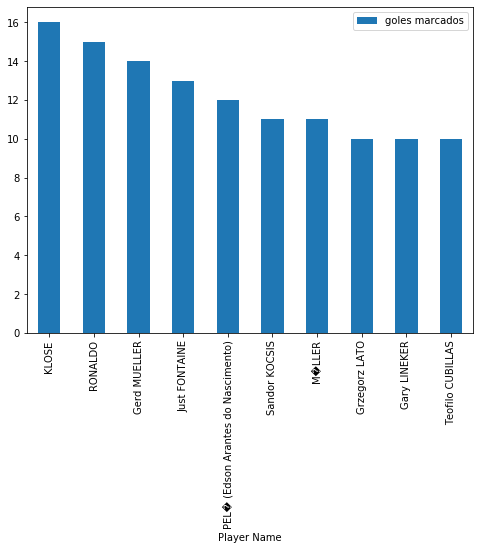

In [236]:
# los 10 mas goleadores en los mundiales

pd.pivot_table(jugadores8,index=["Player Name"],values='goles marcados',
               aggfunc='sum').sort_values("goles marcados", ascending=False).head(10).plot.bar(figsize=(8, 6));

In [245]:
# los jugadores con mas tarjetas amarillas

pd.pivot_table(jugadores8,index=["Player Name"],values='tarjetas amarillas',
               aggfunc='sum').sort_values("tarjetas amarillas", ascending=False).head(10)

,tarjetas amarillas
Player Name,
V. BRONCKHORST,7
PAREDES,7
COSTINHA,6
POPE,6
HEITINGA,6
W. PALACIOS,6
EMERTON,6
CAFU,6
ASAMOAH,6


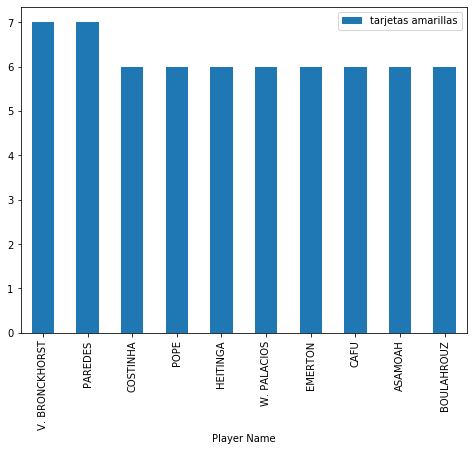

In [237]:
# los jugadores con mas tarjetas amarillas

pd.pivot_table(jugadores8,index=["Player Name"],values='tarjetas amarillas',
               aggfunc='sum').sort_values("tarjetas amarillas", ascending=False).head(10).plot.bar(figsize=(8, 6));

In [49]:
# los jugadores con mas tarjetas rojos

pd.pivot_table(jugadores8,index=["Player Name"],values='tarjetas roja',
               aggfunc='sum').sort_values("tarjetas roja", ascending=False).head(10)#.plot.bar();

,tarjetas roja
Player Name,
SONG,2
Emil KREMENLIEV,1
Refik SABANADZOVIC,1
Dick NANNINGA,1
Rafael ALBRECHT,1
Ramon RAMIREZ,1
David BECKHAM,1
Darryl POWELL,1
Ray RICHARDS,1


In [50]:
# los jugadores con mas penales acertados

pd.pivot_table(jugadores8,index=["Player Name"],values='penales acertados',
               aggfunc='sum').sort_values("penales acertados", ascending=False).head(10)#.plot.bar();

,penales acertados
Player Name,
Rob RENSENBRINK,4
EUSEBIO (Eusebio da Silva Ferreira),4
STOITCHKOV,3
DAVID VILLA,3
Johan NEESKENS,3
A. GYAN,3
Daniel PASSARELLA,2
Igor BELANOV,2
Fritz WALTER,2


In [51]:
# los jugadores con mas penales perdidos

pd.pivot_table(jugadores8,index=["Player Name"],values='penales perdidos',
               aggfunc='sum').sort_values("penales perdidos", ascending=False).head(10)#.plot.bar();

,penales perdidos
Player Name,
BENZEMA,1
A. GYAN,1
PODOLSKI,1
ORTEGA,1
TOMASSON,1
ALONSO,1
J H AHN,1
CARDOZO,1
ZURAWSKI,1


In [52]:
# los 10 mas autogoles

pd.pivot_table(jugadores8,index=["Player Name"],values='autogol',
               aggfunc='sum').sort_values("autogol", ascending=False).head(10)#.plot.bar();
               

,autogol
Player Name,
Ernie BRANDTS,1
CHUYOUNG,1
Youssef CHIPPO,1
Jozef BARMOS,1
Ruud KROL,1
Pierre ISSA,1
Javier GUZMAN,1
ZUBIZARRETA,1
Jose PARRA,1


# **Punto 9**

## Evalúe dependencia lineal entre las variables de cada BBDD y obtenga una relación para determinar el ganador de cada partido.

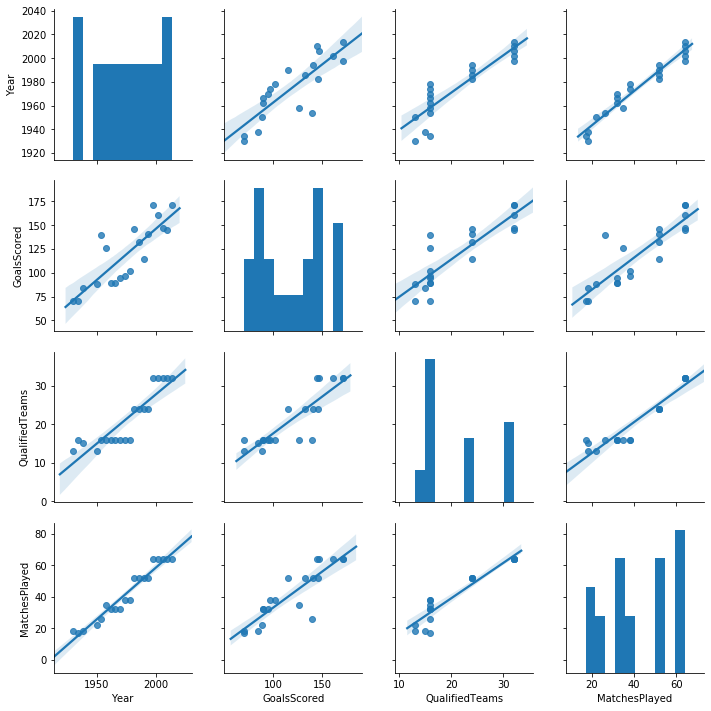

In [219]:
cc = copas.corr().round(3).style.background_gradient(cmap='YlOrBr_r')
sns.pairplot(copas, kind="reg",palette='green')
plt.show()      

En la comparacion de variables del df de copas si podemos decir que las variables si tienen una relacion lineal ascendente, ya que por ejemplo en si pasan los años existen mayor cantidad de juegos disputados, asi tambien si existen mas partidos disputas tambien ecisten mejor cantidad de goles, asi mismo con la variable de equipos clasificados a mundiales

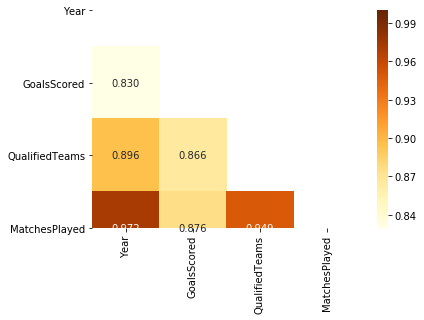

In [215]:
mask = np.zeros_like(copas.corr(method='pearson'), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(copas.corr(method='pearson'),annot=True,fmt='.3f',
            mask=mask, cmap='YlOrBr');
plt.yticks(rotation=0)
plt.show()

Acá con el headmap podemos ver la correlacion muy alta entre todas las variables del dataframe

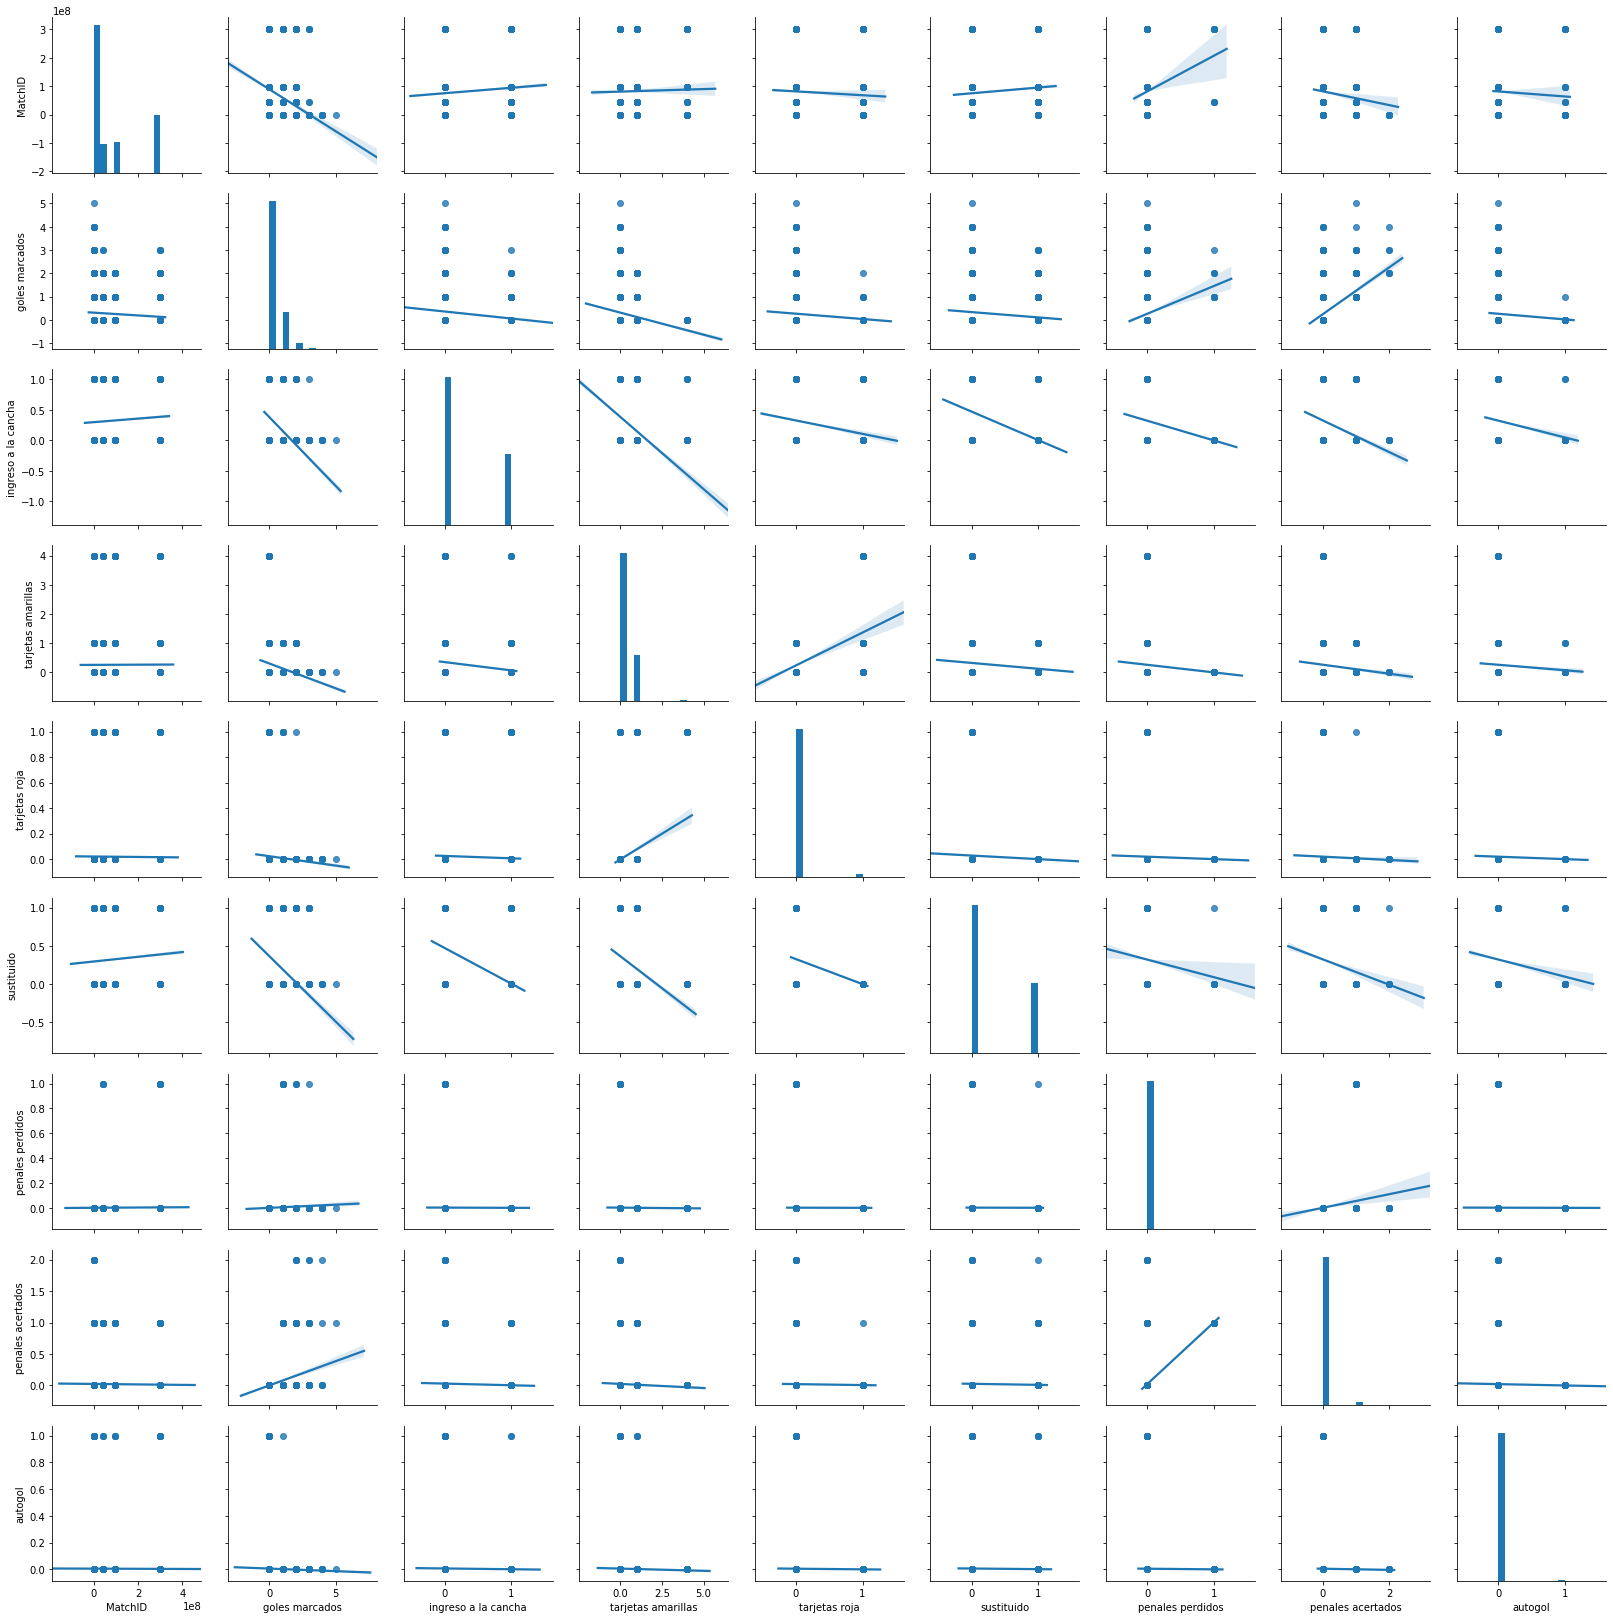

In [218]:
cj = jugadores9.corr().round(3).style.background_gradient(cmap='YlOrBr_r')
sns.pairplot(jugadores9, kind="reg",palette='green')
plt.show() 

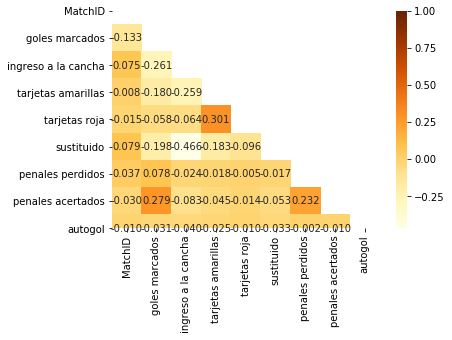

In [216]:
mask = np.zeros_like(jugadores9.corr(method='pearson'), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(jugadores9.corr(method='pearson'),annot=True,fmt='.3f',
            mask=mask, cmap='YlOrBr');
plt.yticks(rotation=0)
plt.show()

en el siguiente headmap del df de jugadores podemos observar que existe una relacion bastante alta entre las tarjetas amarillas con las tarjetas rojas, eso significa que en muchos casos los jugadores que el arbitro les coloca tarjetas amarillas estos pueden tener probabilidades de obtener una tarjeta roja. El punto que me llamo la atencion es el de ingreso a la cancha desde el banco con goles marcados, al parecer hay una correlacion pero mas inversa, asi como tambien los que ingresan desde el banco tambien tienen una correlacion negativa con las tarjetas amarillas

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


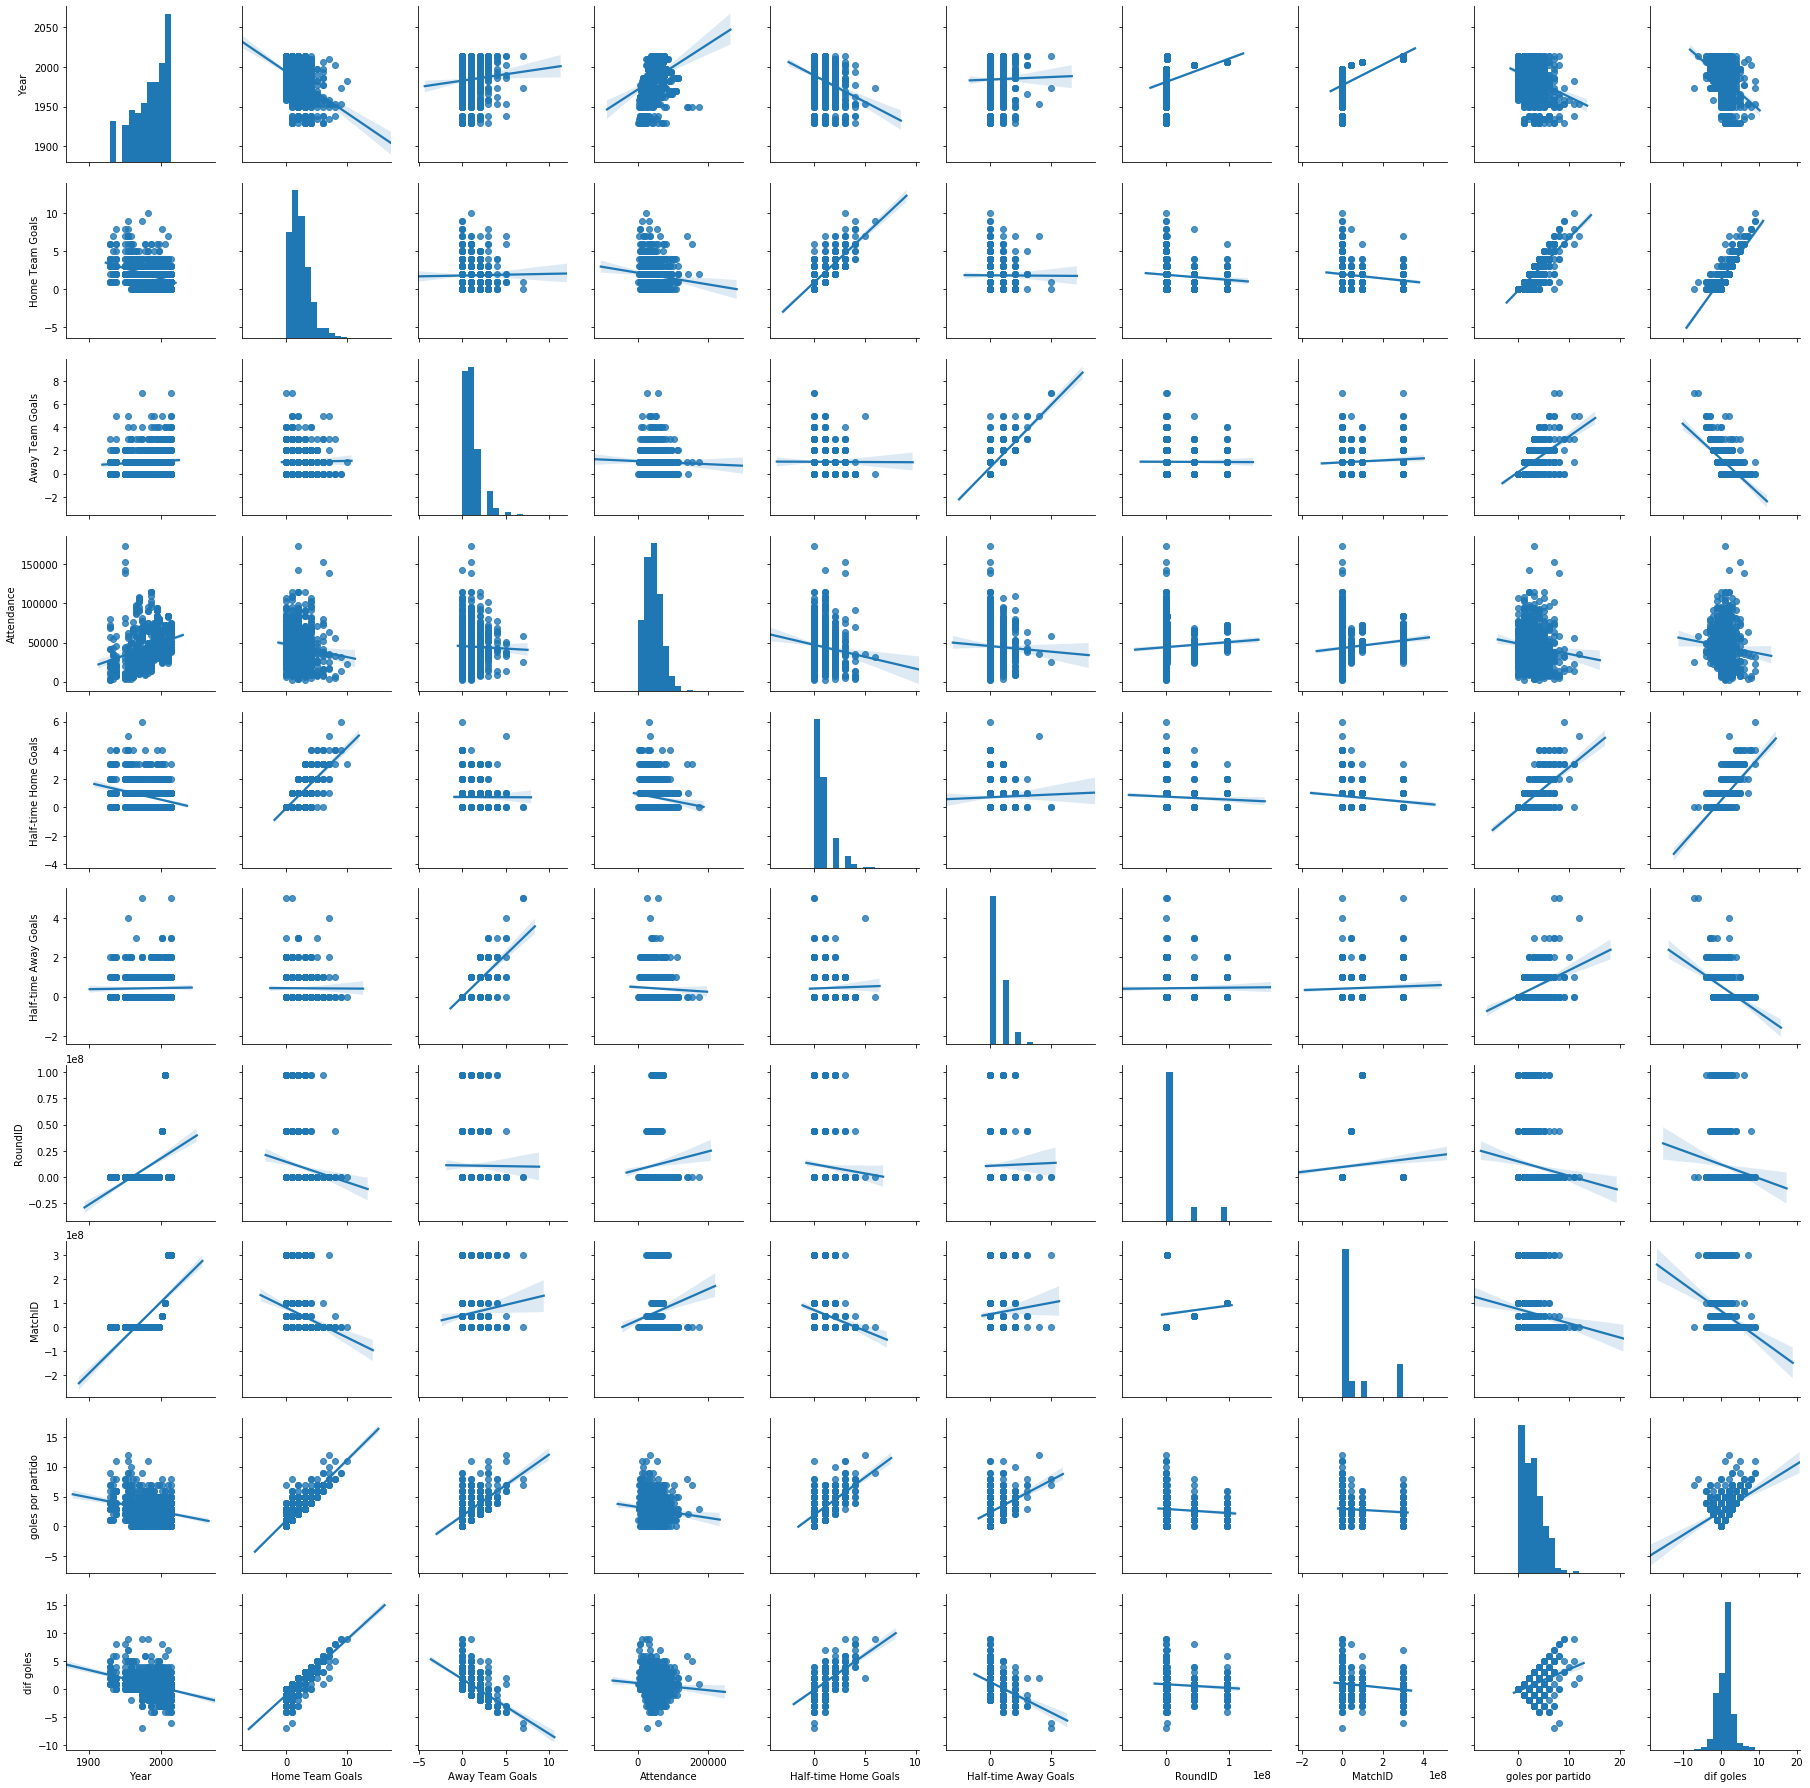

In [220]:
cp = partidos1.corr().round(3).style.background_gradient(cmap='YlOrBr_r')
sns.pairplot(partidos1, kind="reg",palette='green')
plt.show() 

## Relacione el máximo goleador del mundial con el ganador del torneo

In [0]:

#para unir tener el año en el df de jugadores pero haciendo merge con MatchID con el df de partidos
partidos1['MatchID'] = partidos1['MatchID'].astype(np.int64)
jugadores9=jugadores8[["MatchID","Player Name","goles marcados","ingreso a la cancha","tarjetas amarillas","tarjetas roja","sustituido","penales perdidos","penales acertados","autogol"]]
datos9=pd.merge(partidos1 , jugadores9, left_on="MatchID", right_on="MatchID" )

datos9=datos9[["Year","MatchID","Player Name","goles marcados","ingreso a la cancha","tarjetas amarillas","tarjetas roja","sustituido","penales perdidos","penales acertados","autogol"]]

#agrupando un nuevo df que incluye los años
rr9=datos9.groupby(['Year','Player Name'])['goles marcados'].sum().reset_index()




In [199]:
#para calcular los maximos goleadores por mundial, pude hacer una funcion pero la verdad es que no me estaba saliendo y preferí darle prioridad a obtener un resultado
r1930=rr9[rr9["Year"]==1930].sort_values(by="goles marcados", ascending=False).head(1)
r1934=rr9[rr9["Year"]==1934].sort_values(by="goles marcados", ascending=False).head(1)
r1938=rr9[rr9["Year"]==1938].sort_values(by="goles marcados", ascending=False).head(1)
r1950=rr9[rr9["Year"]==1950].sort_values(by="goles marcados", ascending=False).head(1)
r1954=rr9[rr9["Year"]==1954].sort_values(by="goles marcados", ascending=False).head(1)
r1958=rr9[rr9["Year"]==1958].sort_values(by="goles marcados", ascending=False).head(1)
r1962=rr9[rr9["Year"]==1962].sort_values(by="goles marcados", ascending=False).head(6)
r1966=rr9[rr9["Year"]==1966].sort_values(by="goles marcados", ascending=False).head(1)
r1970=rr9[rr9["Year"]==1970].sort_values(by="goles marcados", ascending=False).head(1)
r1974=rr9[rr9["Year"]==1974].sort_values(by="goles marcados", ascending=False).head(1)
r1978=rr9[rr9["Year"]==1978].sort_values(by="goles marcados", ascending=False).head(1)
r1982=rr9[rr9["Year"]==1982].sort_values(by="goles marcados", ascending=False).head(1)
r1986=rr9[rr9["Year"]==1986].sort_values(by="goles marcados", ascending=False).head(1)
r1990=rr9[rr9["Year"]==1990].sort_values(by="goles marcados", ascending=False).head(1)
r1994=rr9[rr9["Year"]==1994].sort_values(by="goles marcados", ascending=False).head(2)
r1998=rr9[rr9["Year"]==1998].sort_values(by="goles marcados", ascending=False).head(1)
r2002=rr9[rr9["Year"]==2002].sort_values(by="goles marcados", ascending=False).head(1)
r2006=rr9[rr9["Year"]==2006].sort_values(by="goles marcados", ascending=False).head(1)
r2010=rr9[rr9["Year"]==2010].sort_values(by="goles marcados", ascending=False).head(4)
r2014=rr9[rr9["Year"]==2014].sort_values(by="goles marcados", ascending=False).head(1)
rID=pd.concat ([r1930,r1934,r1938,r1950,r1954,r1958,r1962,r1966,r1970,r1974,r1978,r1982,r1986,r1990,r1994,r1998,r2002,r2006,r2010,r2014])
rID


,Year,Player Name,goles marcados
13,1930.0,Guillermo STABILE,8
73,1934.0,Oldrich NEJEDLY,5
109,1938.0,LEONIDAS,7
129,1950.0,ADEMIR,8
236,1954.0,Sandor KOCSIS,11
274,1958.0,Just FONTAINE,13
361,1962.0,Valentin IVANOV,4
359,1962.0,VAVA,4
322,1962.0,GARRINCHA,4
317,1962.0,Drazen JERKOVIC,4


PD: existen errores de tipeo como el caso de Ronaldo de brazil y Ronaldo de portugal (que por cierto lo corregí) y este tipo de problemas puede hacer que exista una pequeña variacion en la cantiad de goles de los jugadores, pero en genenal son pocos los cambios ya que lo revise con la pagina que adjunto mas abajo. Ademas pueden existir goles de penal no escritos o escrito dos veces, pero en general hay pocos cambios con los resultados la pagina.

Tambien coloqué mas cantidad de jugadores por mundial cuando el maximo goleador compartian el puesto por igualdad de goles segun la pagina de la fuente.

https://www.americatv.com.pe/deportes/futbol-mundial/miroslav-klose-lidera-lista-aqui-goleadores-historicos-mundiales-n324532


# **Punto 10**

## Realice un reporte en donde clarifique sus conclusiones por mundial y de manera clara se de cuenta una descripción estadística específica y a su vez muestre la metodología expuesta para determinar dichas observaciones.

In [230]:
 ganadoresmundiales=copas[["Year", "Country","Winner"]].copy()
 #la incluyo manualmente y en los casos que hay mas de un goleador solo dejare el que represente al pais ganador de la copa
 paisgoleador=["Argentina","Checo","Brazil","Brazil", "Hungria","France", "Brazil","Portugal","Germany", "Polonia", "Argentina","Italy","England","Italy","Russia","Croacia", "Brazil", "Germany","Spain","Colombia" ]
 ganadoresmundiales["pais goleador"]=paisgoleador
 ganadoresmundiales

,Year,Country,Winner,pais goleador
0,1930,Uruguay,Uruguay,Argentina
1,1934,Italy,Italy,Checo
2,1938,France,Italy,Brazil
3,1950,Brazil,Uruguay,Brazil
4,1954,Switzerland,Germany FR,Hungria
5,1958,Sweden,Brazil,France
6,1962,Chile,Brazil,Brazil
7,1966,England,England,Portugal
8,1970,Mexico,Brazil,Germany
9,1974,Germany,Germany FR,Polonia


En el mundial del 1962, 1978, 1982, 2002 y 2010 los goleadores han sido campeones de los mundiales, osea 5 de los 20 mundiales, eso significa que solo 25% de probabilidad de que el goleador del torneo tambien sea campeon del mundial

Otra relacion es el ganador con el pais organizador del mundial, donde en 1930, 1934,1966,1974,1978,1998 ganaron tambien el mundial, 6 de los 20 mundiales, osea el pais organizador existe un 30% de probabilidad de ser campeon.

In [246]:
#cantidad de partidos ganados, empatados y perdidos segun equipo local
partidos1["Resultado Local"].value_counts()

Ganados      479
Empatados    186
Perdidos     171
Name: Resultado Local, dtype: int64

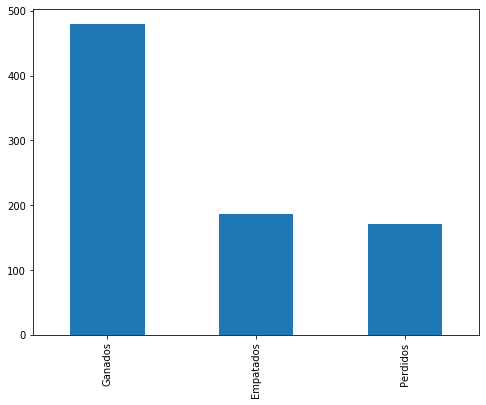

In [248]:
#cantidad de partidos ganados, empatados y perdidos segun equipo local
partidos1["Resultado Local"].value_counts().plot.bar(figsize=(8, 6));

Aunque obviamente en la mayoria de los partidos quien jugue de local no lo es ya que el unico local en cada mundial es el organizador, en lo que respecta al orden de local y visita generalmente en el futbol los cabezas de serie son los equipos que juegan como equipo local, en cambio los equipos que clasifican 2dos o 3eros generalmente son inscritos como en el partido como el equipo visita, es por esto que se da la relacion de que los locales ganan mucho mas que los que juegan de visita ya que al ser cabezas de serie generalmente vienen con un mejor rendimiento fisico.


In [249]:
print(resultadoscompletos6.to_string())

Resultado                   Empatados  Ganados  Perdidos
Pais                                                    
Algeria                             3        3         7
Angola                              2        0         1
Argentina                          14       42        21
Australia                           3        2         8
Austria                             4       12        13
Belgium                             9       14        18
Bolivia                             1        0         5
Brazil                             17       70        17
Bulgaria                            8        3        15
Cameroon                            7        4        12
Canada                              0        0         3
Chile                               7       11        15
China PR                            0        0         3
Colombia                            2        7         9
Costa Rica                          4        5         6
Croatia                        

Segun la tabla del punto 6 podemos observar que los paises que mas partidos juegan en mundiales son aquellos que han sido campeones y/o finalistas (como brasil, inglaterra, alemania,argentina,francia, etc) ya que hay paises como el nuestro que han jugado pocos partidos en mundiales tambien porque pocas veces clasifican, en cambio los paises mas ganadores tienen mucho mejor rendimiento y participacion en mundiales.
